In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import corner as corner


sys.path.append('../')
import utils as ut

%reload_ext autoreload
%autoreload 2

/home/mpieroni/.pyenv/versions/3.10.9/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path_to_data = '../KL_data/'

!ls {path_to_data}

100  1000  10000  200  2000  20000  500  5000  old


In [9]:
train_data = np.array([100, 200, 500, 1000, 2000, 5000, 10000, 20000]) #
linestyles = ['-', '--', '-.', ':']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']

In [10]:
num_epochs = 1000
check_every = 10
example_name = "gaussian_mixture"

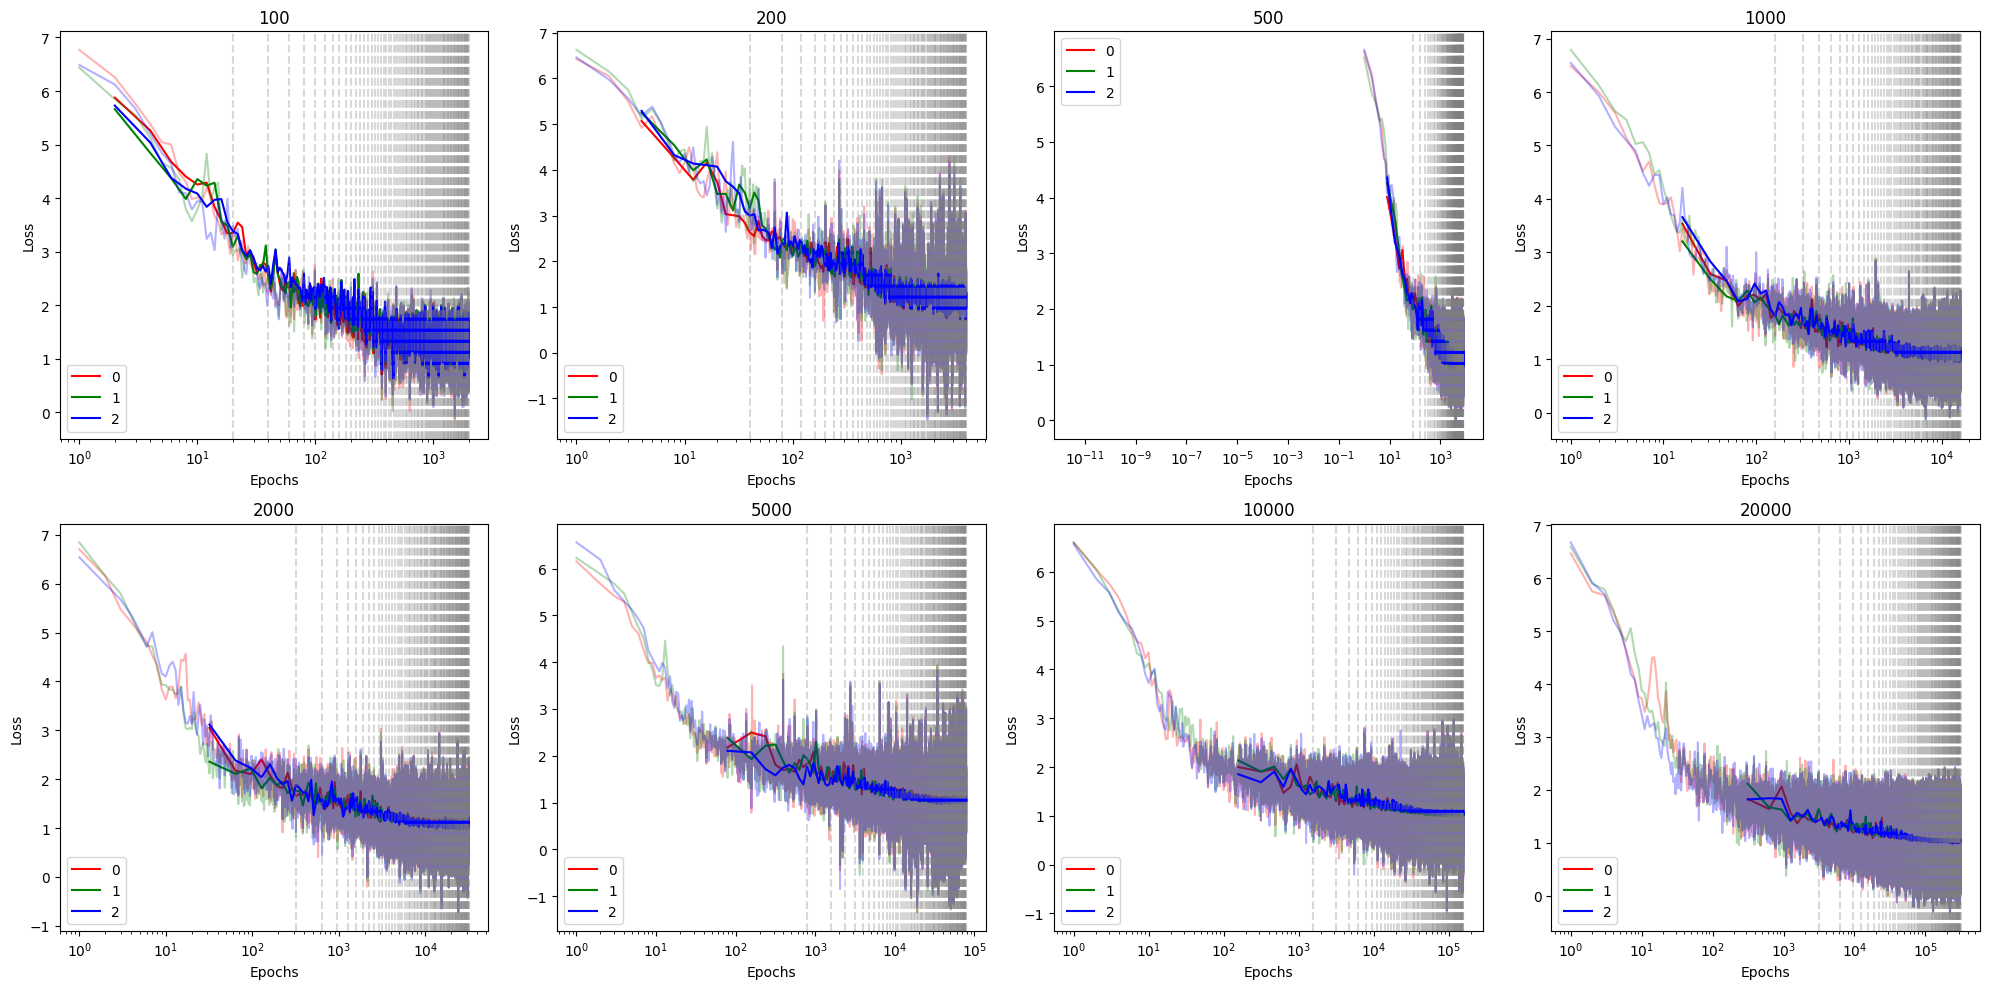

In [11]:

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i in range(len(train_data)):
    num_train = train_data[i]
    data = np.load(path_to_data+str(num_train)+'/'+example_name + f"_{num_epochs}_{check_every}.npz")
    ut.plot_losses(data['train'], data['val'], check_every, ax=ax[int(i/4)][i%4])  
    ax[int(i/4)][i%4].set_title(num_train) 
    ax[int(i/4)][i%4].set_xlabel('Epochs')
    ax[int(i/4)][i%4].set_ylabel('Loss')
    ax[int(i/4)][i%4].set_xscale('log')
    
fig.tight_layout()


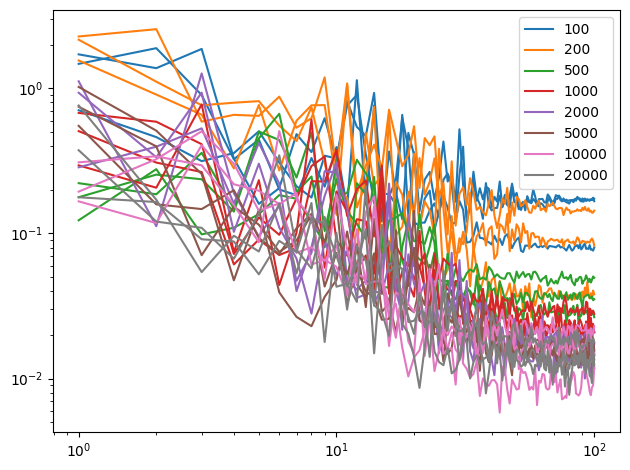

In [12]:

for i in range(len(train_data)):
    num_train = train_data[i]
    data = np.load(path_to_data+str(num_train)+'/'+example_name + f"_{num_epochs}_{check_every}.npz")
    for j in range(3):
        if j == 0:
            plt.loglog(np.arange(len(data['KL'][:,j]))+1, data['KL'][:,j], label=str(num_train), color=colors[i])
        else:
            plt.loglog(np.arange(len(data['KL'][:,j]))+1, data['KL'][:,j], color=colors[i])

plt.legend()
plt.tight_layout()

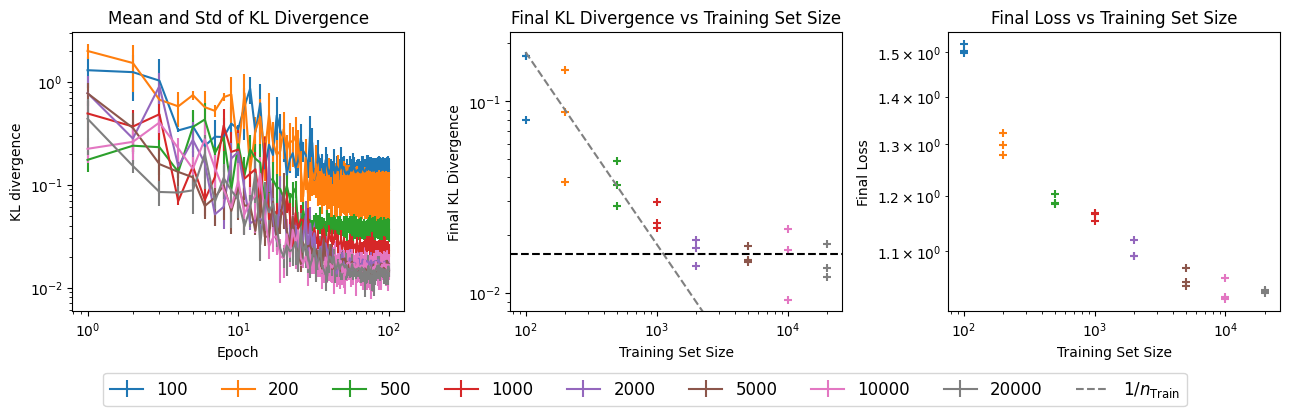

In [14]:
fig, ax = plt.subplots(ncols=3, figsize=(13, 4))

for i in range(len(train_data)):
    num_train = train_data[i]
    data = np.load('../KL_data/'+str(num_train)+'/'+example_name + f"_{num_epochs}_{check_every}.npz")
    
    mean = np.mean(data['KL'], axis=-1)
    std = np.std(data['KL'], axis=-1)

    ax[0].errorbar(np.arange(len(data['KL']))+1, mean, yerr=std, label=str(num_train), color=colors[i])

    ax[1].scatter([num_train for j in range(3)], np.mean(data['KL'][-30:,:], axis=0), marker='+')

    
    ax[2].scatter([num_train for j in range(3)], data['val'][:,-1], marker='+')
    
ax[1].loglog(train_data, 1.8e1 * np.array(train_data, dtype=float)**(-1) , 'grey', linestyle='dashed', label=r'$1 / n_{\rm Train}$')
ax[1].axhline(1.6e-2, color='black', linestyle='dashed')

for i in range(3):
    ax[i].set_xscale('log')
    ax[i].set_yscale('log') 
    
ax[1].set_ylim(8e-3, 2.3e-1)
    
ax[0].set_ylabel(r'KL divergence')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Mean and Std of KL Divergence')

ax[1].set_ylabel(r'Final KL Divergence')
ax[1].set_xlabel('Training Set Size')
ax[1].set_title('Final KL Divergence vs Training Set Size')

ax[2].set_ylabel(r'Final Loss')
ax[2].set_xlabel('Training Set Size')
ax[2].set_title('Final Loss vs Training Set Size')


handles, labels = ax[0].get_legend_handles_labels()

for j in range(1, 3):
    h, l = ax[j].get_legend_handles_labels()
    handles.extend(h[-1:])
    labels.extend(l[-1:])
fig.legend(handles, labels, loc='lower center', ncol=9, bbox_to_anchor=(0.5, -0.05), fontsize=12)
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust rect to make space for the legend

plt.savefig('KL_divergence.pdf', bbox_inches='tight')

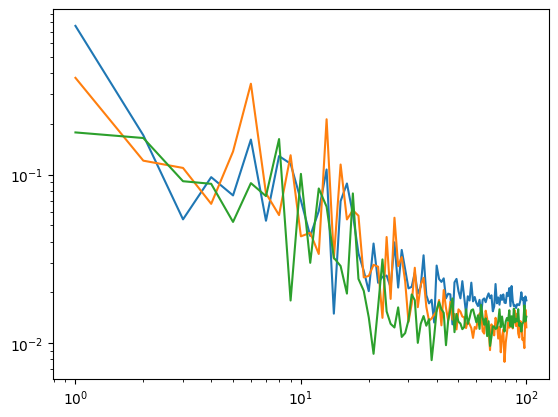

In [15]:
for j in range(3):
    plt.loglog(np.arange(len(data['KL'][:,j]))+1, data['KL'][:,j])


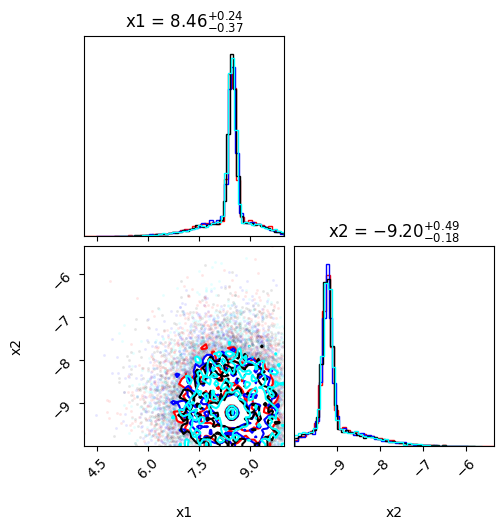

In [16]:
import sbibm

i_obs = 9

example_name = "gaussian_mixture"
task = sbibm.get_task(example_name)
prior = task.get_prior_dist()
simulator = task.get_simulator()
observation = task.get_observation(num_observation=i_obs+1)
data_test = np.array(task.get_reference_posterior_samples(num_observation=i_obs+1))


fig = corner.corner(data['post_samples'][i_obs,0], labels=['x1', 'x2'], show_titles=True, color='red', bins=50, smooth=.5, hist_kwargs={'density': True});

fig = corner.corner(data['post_samples'][i_obs,1], labels=['x1', 'x2'], show_titles=True, color='blue', fig=fig, bins=50, smooth=.5, hist_kwargs={'density': True});

corner.corner(data['post_samples'][i_obs,2], labels=['x1', 'x2'], show_titles=True, color='black', fig=fig, bins=50, smooth=.5, hist_kwargs={'density': True});

corner.corner(data_test, labels=['x1', 'x2'], show_titles=True, color='cyan', fig=fig, bins=50, smooth=.5, hist_kwargs={'density': True});

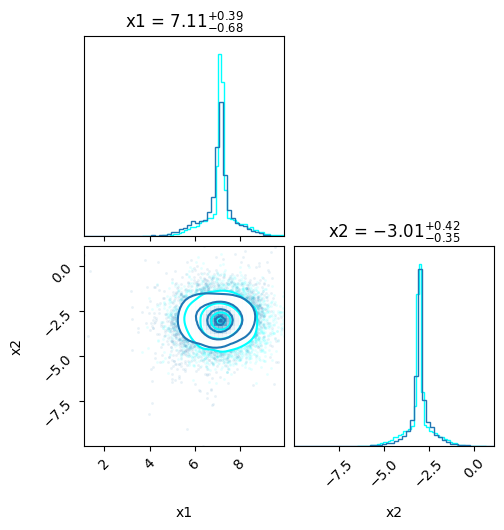

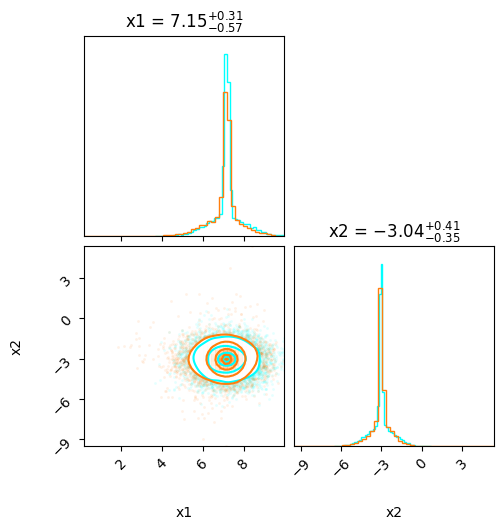

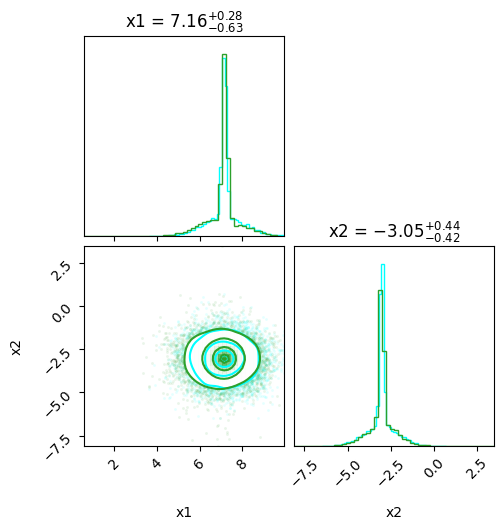

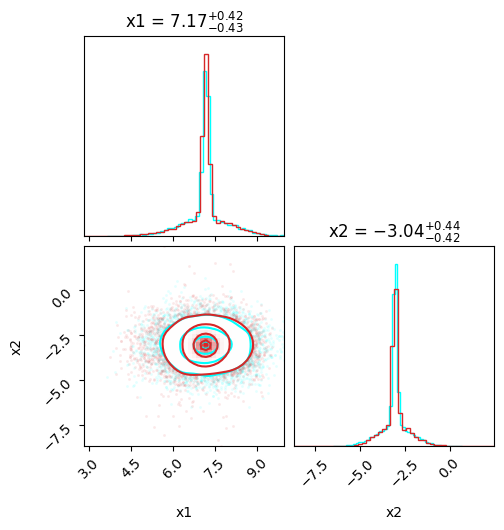

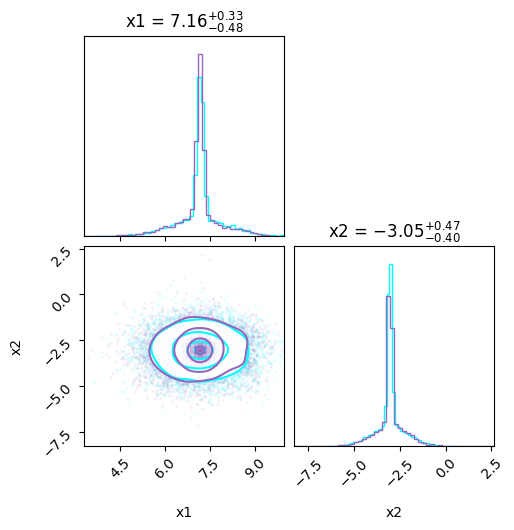

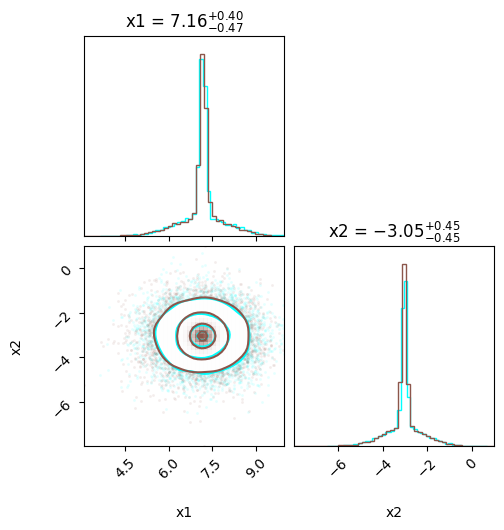

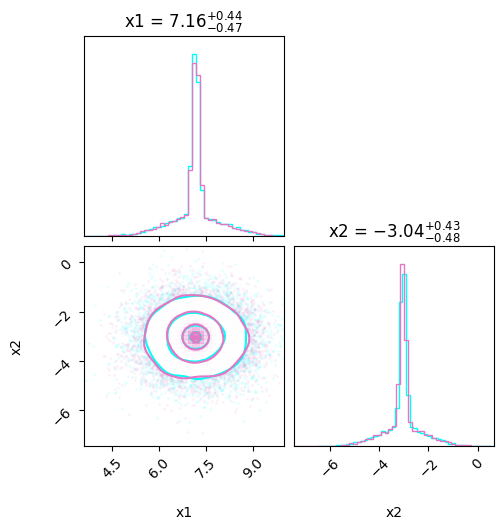

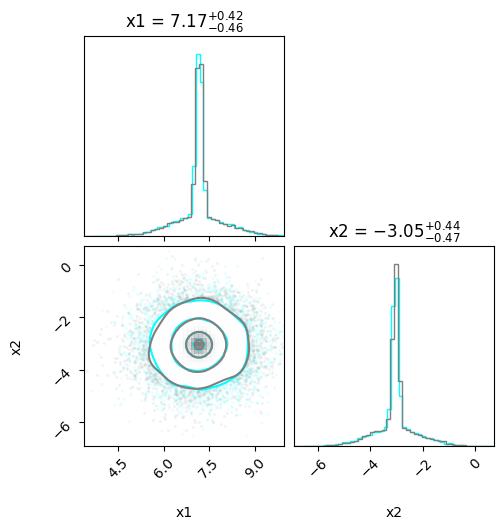

In [17]:
import sbibm
import matplotlib.lines as mlines

i_obs = 2

example_name = "gaussian_mixture"
task = sbibm.get_task(example_name)
prior = task.get_prior_dist()
simulator = task.get_simulator()
observation = task.get_observation(num_observation=i_obs+1)
data_test = np.array(task.get_reference_posterior_samples(num_observation=i_obs+1))




for i in range(len(train_data)):
    num_train = train_data[i]
    data = np.load(path_to_data+str(num_train)+'/'+example_name + f"_{num_epochs}_{check_every}.npz")
    
    fig = corner.corner(data_test, labels=['x1', 'x2'], show_titles=True, color='cyan', bins=50, smooth=2, hist_kwargs={'density': True});
    
    corner.corner(data['post_samples'][i_obs,0], labels=['x1', 'x2'], show_titles=True, color=colors[i], bins=50, smooth=2, hist_kwargs={'density': True}, fig=fig);



# plt.legend(
#     handles=[
#         mlines.Line2D([], [], color=colors[i], label=str(train_data[i]))
#         for i in range(len(train_data))
#     ],
#     fontsize=12, frameon=False,
#     bbox_to_anchor=(1, 2), loc="upper right"
# )
    
# fig = corner.corner(data['post_samples'][i_obs,1], labels=['x1', 'x2'], show_titles=True, color='blue', fig=fig, bins=50, smooth=.5, hist_kwargs={'density': True});

# corner.corner(data['post_samples'][i_obs,2], labels=['x1', 'x2'], show_titles=True, color='black', fig=fig, bins=50, smooth=.5, hist_kwargs={'density': True});

